In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [3]:
# Load dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = ['label', 'text']
    data['label'] = data['label'].map({'ham': 0, 'spam': 1})
    return data

In [4]:
# Preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    return text

In [5]:
# Load and preprocess data
file_path = 'Spam_SMS.csv'
data = load_data(file_path)
data['text'] = data['text'].apply(preprocess_text)

C:\Users\Sarvesh PV\AppData\Local\Temp\ipykernel_23404\3016903582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


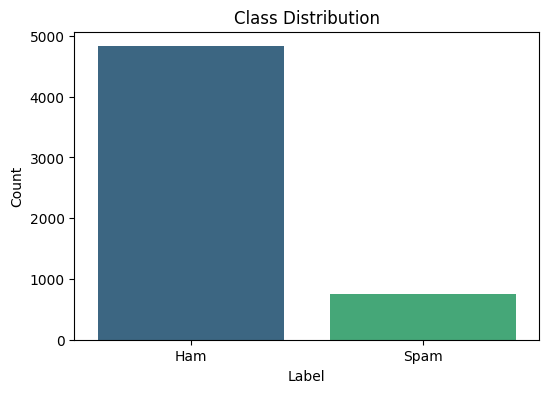

In [6]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

In [7]:
# Split the data
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [9]:
# Pad sequences
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

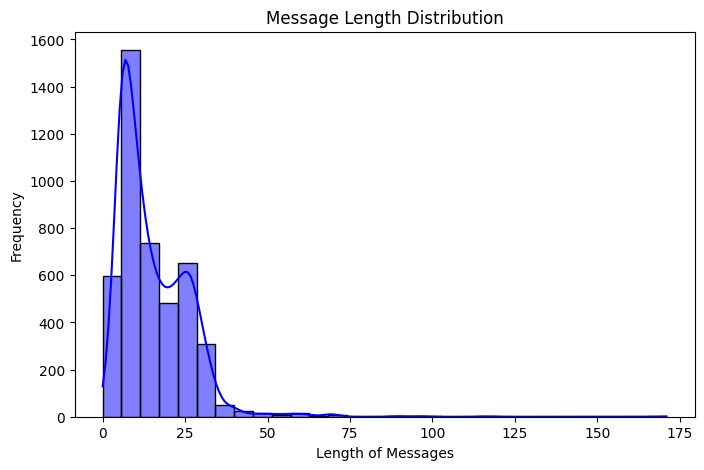

In [10]:
# Visualize the length of messages
message_lengths = [len(seq) for seq in X_train_seq]
plt.figure(figsize=(8, 5))
sns.histplot(message_lengths, bins=30, kde=True, color='blue')
plt.title('Message Length Distribution')
plt.xlabel('Length of Messages')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Build the CNN model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\Sarvesh PV\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8199 - loss: 0.4710 - val_accuracy: 0.9596 - val_loss: 0.1473
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9816 - loss: 0.0737 - val_accuracy: 0.9865 - val_loss: 0.0532
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9934 - loss: 0.0251 - val_accuracy: 0.9888 - val_loss: 0.0401
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9986 - loss: 0.0098 - val_accuracy: 0.9865 - val_loss: 0.0343
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9997 - loss: 0.0033 - val_accuracy: 0.9888 - val_loss: 0.0375
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 0.9888 - val_loss: 0.0341
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 0.9888 - val_loss: 0.0438
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.2765e-04 - val_accuracy

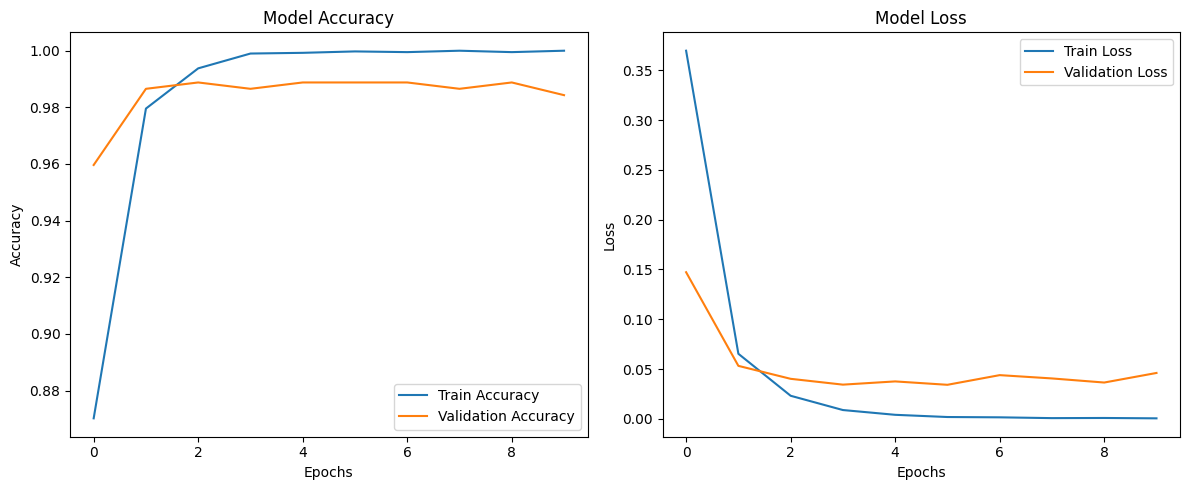

In [13]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
# Evaluate the model
y_pred = (model.predict(X_test_pad) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9838565022421525
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       966
        Spam       0.96      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



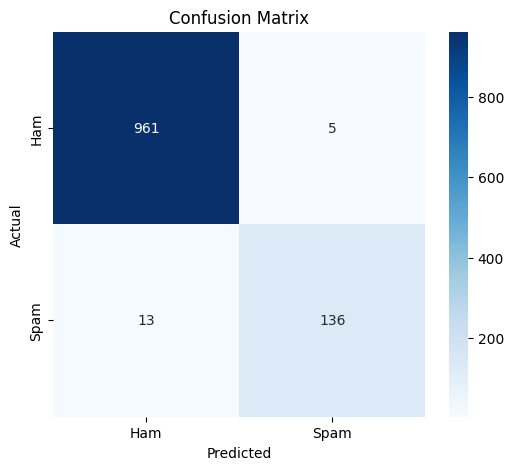

In [15]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [16]:
model.save('model.h5')
print("Model saved as model.h5")


Model saved as model.h5


In [17]:
import pickle

with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)
print("Tokenizer saved as tokenizer.pkl")


Tokenizer saved as tokenizer.pkl
